En este código se pretende calcular el angulo $\theta$, que corresponde al ángulo entre el momento angular del disco $\bf{\vec{J_{d}}}$ y el momentum angular del Agujero negro $\bf{\vec{J_{bh}}}$. Se pretende determinar la posible relación del $\cos(\theta)$ con la masa del halo $M_{halo}$ y la masa del agujero negro $M_{bh}$.


In [1]:
#librerías
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import gadget 
import arepo

"""
===================================
    ->Lectura de los autovectores
"""

from struct import *
import sys
import os


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/daniel/.local/lib/python3.6/site-packages/gadget-0.1-py3.6-linux-x86_64.egg/gadget/const.py:20: UserWarning: Could not setup constants
  warnings.warn("Could not setup constants")


In [2]:
"""
INFORMACION SOBRE LOS HALOS
"""

#DataFolder= '../../Data/groups_015/'
#SnapNumber= 1


#sub = arepo.Subfind('%s/'%(DataFolder), SnapNumber ,combineFiles=True)
sub = gadget.Subfind('../../Data/groups_015/fof_subhalo_tab_015.0.hdf5' ,combineFiles=True)

In [31]:
"""
HALOS
"""

Mass_halo= sub.SubhaloMass*10e10/0.7 
vel_halo = sub.SubhaloVel ##km/s 
vel_dis_halo = sub.SubhaloVelDisp ##km/s 
vel_max_halo = sub.SubhaloVmax  ##km/s 
spin_halo=sub.SubhaloSpin ##ckpc/h
r_halo = sub.SubhaloPos ## posicion en x,y,z ckp/h


In [35]:
print(len(Mass_halo))
print(len(spin_halo))

#print(vel_halo)
#print(len(vel_dis_halo))


104841
104841


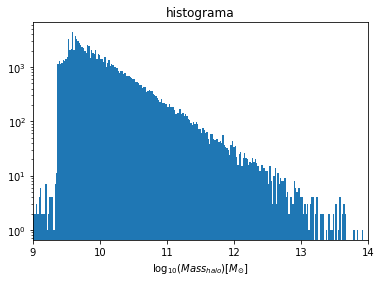

In [18]:
"""
Histograma de masa de los halos
"""
Bines=np.int(np.sqrt(len(Mass_halo)))
#hist_Mass_halo=np.histogram(np.log10(Mass_halo), bins=17)
plt.figure()
plt.hist(np.log10(Mass_halo),bins=Bines, log=True)
plt.xlim(9,14)
plt.title("histograma")
plt.xlabel("$\log_{10}(Mass_{halo})[M_{\odot}]$")
plt.savefig("histo_Mass_halo.png")



/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10


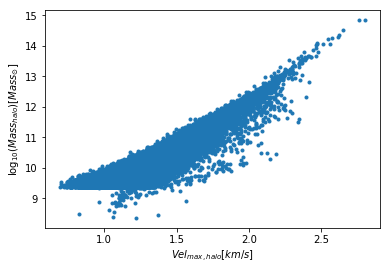

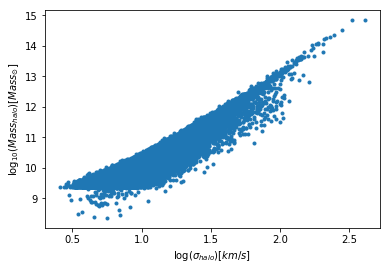

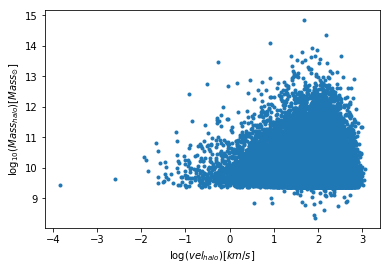

In [6]:
"""
GRAFICAS DE VERIFIVACION
    --> En esta parte del codigo se pretende
        verificar si los datos y los calculos 
        son congruentes.
"""
#fig, (ax1, ax2, ax3) = plt.subplots(ncols=3 ,figsize=(19, 5))

"""
ax1.plot(np.log10(vel_max_halo),np.log10(Mass_halo),".")
ax1.set_xlabel("$Vel_{max,halo}[km/s]$")
ax1.set_ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_max_VS_mass_Halo.png')

ax2.plot(np.log10(vel_dis_halo),np.log10(Mass_halo),".")
ax2.set_xlabel("$\log(\sigma_{halo})[km/s]$")
ax2.set_ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_dis_VS_mass_Halo.png')

ax3.plot(np.log10(np.abs(vel_halo)),np.log10(Mass_halo),".")
ax3.set_xlabel("$\log(vel_{halo})[km/s]$")
ax3.set_ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_VS_mass_Halo.png')
"""

plt.figure()
plt.plot(np.log10(vel_max_halo),np.log10(Mass_halo),".")
plt.xlabel("$Vel_{max,halo}[km/s]$")
plt.ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_max_VS_mass_Halo.png')

plt.figure()
plt.plot(np.log10(vel_dis_halo),np.log10(Mass_halo),".")
plt.xlabel("$\log(\sigma_{halo})[km/s]$")
plt.ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_dis_VS_mass_Halo.png')

plt.figure()
plt.plot(np.log10(vel_halo[:,0]),np.log10(Mass_halo),".") ###velocidad en la direcion en X
plt.xlabel("$\log(vel_{halo})[km/s]$")
plt.ylabel("$\log_{10}(Mass_{halo})[Mass_{\odot}]$")
plt.savefig('vel_VS_mass_Halo.png')




In [7]:
Sn_bh = gadget.Snapshot('../../Data/snap_015.0.hdf5', parttype=[5])


In [30]:
"""
BLACK HOLES
"""

Spin_bh=Sn_bh.BH_SpinOrientation #Spin de los black hole
r_bh = Sn_bh.Coordinates  # cordanada en x,y,z
Mass_bh = Sn_bh.BH_Mass*10e10/0.7 ## M(sun)
vel_disp_bh = Sn_bh.SubfindVelDisp  ##km/s
vel_bh = Sn_bh.Velocities ##km*sqrt(a)/s
Sn_bh.Coordinates

Quantity([[  631.28878196,  7531.14490752,  7167.51987284],
       [  663.85491272,  7542.56652565,  7138.94906246],
       [  690.30428576,  7601.26662394,  6818.69049836],
       [  425.63533352,  7639.22267624,  6806.7480046 ],
       [  906.20003826,  7640.45772474,  6935.2736818 ],
       [  646.87401608,  6998.73256069,  7394.17057261],
       [  993.93650611,  8200.26887895,  6837.61417368],
       [  484.42259957,  7867.15041299,  6365.62227952],
       [  281.81428513,  7482.65211167,  7506.03267541],
       [  744.4964462 ,  8051.67639877,  6365.48292827],
       [  406.18510836,  7730.22179106,  6751.77854405],
       [  638.52256114,  8112.48247954,  6252.38316511],
       [  201.31828569,  8079.92652723,  6059.52221224],
       [  653.51106685,  7557.26593193,  7018.22729886],
       [  628.24215653,  7222.33181589,  7523.21209613],
       [  538.3977704 ,  8201.9072569 ,  6213.72378394],
       [  534.99639846,  7149.22314623,  7463.37354229],
       [  478.91777964,  732

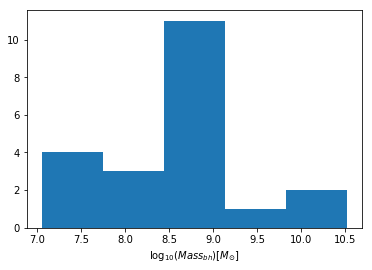

In [9]:

"""
Histograma de masa de los BH's
"""
Bines=np.int(np.sqrt(len(Mass_bh)))
#hist_Mass_halo=np.histogram(np.log10(Mass_halo), bins=17)
plt.hist(np.log10(Mass_bh),bins=5)
plt.xlabel("$\log_{10}(Mass_{bh})[M_{\odot}]$")
plt.savefig("histo_Mass_bh.png")


/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


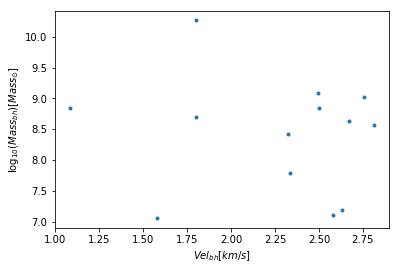

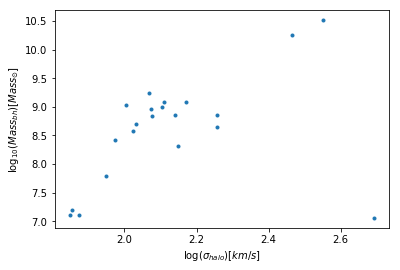

In [10]:
"""
GRAFICAS DE VERIFIVACION
    --> En esta parte del codigo se pretende
        verificar si los datos y los calculos 
        son congruentes.
"""


plt.figure()
plt.plot(np.log10(vel_bh[:,0]),np.log10(Mass_bh),".")
plt.xlabel("$Vel_{bh}[km/s]$")
plt.ylabel("$\log_{10}(Mass_{bh})[Mass_{\odot}]$")
plt.savefig('vel_max_VS_mass_bh.png')

plt.figure()
plt.plot(np.log10(vel_disp_bh),np.log10(Mass_bh),".")
plt.xlabel("$\log(\sigma_{halo})[km/s]$")
plt.ylabel("$\log_{10}(Mass_{bh})[Mass_{\odot}]$")
plt.savefig('vel_dis_VS_mass_bh.png')





In [11]:
#print(r[0])
#print(r_bh)
print(len(r_bh))

21


In [12]:
#Cargar los datos para 

"""
======================
Lectura de Datos 

    ---> EigenVectores
======================
"""

## Dirección archivos ##
#Direction_eigenvector='../Bolshoi/Eigenvec_s1_1'
#Direction_eigenvalor='../Bolshoi/Eigen_s1_1'


folder = '/home/daniel/Documentos/Tesis/Data/Tweb_512/'
file = 'snap_015.s1.00.eigenvec_1'

print("Reading eigenvector file")
f = open("%s%s"%(folder,file), "rb")
#f = open("../Bolshoi/Eigenvec_s1_1", "rb")
dumb = f.read(38)

dumb = f.read(4)
n_x = f.read(4)
n_y = f.read(4)
n_z = f.read(4)
nodes = f.read(4)
x0 = f.read(4)
y0 = f.read(4)
z0 = f.read(4)
dx = f.read(4)
dy = f.read(4)
dz = f.read(4)
dumb = f.read(4)

n_x = (unpack('i', n_x))[0]
n_y = (unpack('i', n_y))[0]
n_z = (unpack('i', n_z))[0]
nodes = (unpack('i', nodes))[0]
dx = (unpack('f', dx))[0]
dy = (unpack('f', dy))[0]
dz = (unpack('f', dz))[0]
x0 = (unpack('f', x0))[0]
y0 = (unpack('f', y0))[0]
z0 = (unpack('f', z0))[0]
print(n_x, n_y, n_z, nodes, dx, dy, dz)

total_nodes = 3 * n_x * n_y *n_z
dumb = f.read(4)
array_data = f.read(total_nodes*4)
dumb = f.read(4)
format_s = str(total_nodes)+'f'
array_data = unpack(format_s, array_data)
f.close()
array_data  = np.array(array_data)
new_array_data = np.reshape(array_data, (3,n_x,n_y,n_z), order='F')
print("--------------------\n")

#print(new_array_data[:,0,0,0])


Reading eigenvector file
64 64 64 262144 195.3125 390.625 390.625
--------------------



In [13]:
###calcular los autovelores para los radios respectivos

#r=[]
#eigen_vec_r=[]
def Eigen_vec(r):
    """
    Esta funcion retorna el valor del auntoVector 
    correspondiente a las coordenadas r(x,y,z)
    """
        
    long_box= 25e3 #longitud caja
    
    dl = n_x/long_box #tamaño de cada celda = numero_celdas/long_caja
    
    i=np.int(r[0]*dl)
    j=np.int(r[1]*dl)
    k=np.int(r[2]*dl)
    
   
    

    """
    eigen_vec_r =np.array([new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]])
    """
    
    eigen_vec_r = [new_array_data[0,i,j,k],\
                            new_array_data[1,i,j,k],\
                            new_array_data[2,i,j,k]]

   
    
    #return r[0],r[1],r[2]
    return eigen_vec_r


In [14]:
print(Eigen_vec(r_bh[5]))

[0.62367087602615356, -0.78894448280334473, 0.1672816276550293]


In [39]:
## asignacion de autovectores con su radio respectivo

Mag_EigenVec_bh=[]
Mag_EigenVec_halo=[]
Mag_Spin_bh=[]
Mag_Spin_halo=[]
Dot_bh=[]
Dot_halo=[]
EigenVec_bh=[]
EigenVec_halo=[]
cos_theta_bh=[]
cos_theta_halo=[]

for i in range(len(r_bh)):
    
    #Enviroment=np.append(Enviroment,[Eigen_vec(r_bh[i])])
    #New_enviroment=reshape(Enviroment,(1,n_x))
    EigenVec_bh.append(Eigen_vec(r_bh[i]))
        
    Mag_EigenVec_bh.append(np.linalg.norm(EigenVec_bh[i])) ##magnitud del autovector
    
    Mag_Spin_bh.append(np.linalg.norm(Spin_bh[i]))       ##magnitud del Spin_bh
        
    Dot_bh.append(np.vdot(EigenVec_bh[i],Spin_bh[i]))      ##Productopunto del autovec y spin_bh
        
    cos_theta_bh.append(Dot_bh[i]/(Mag_EigenVec_bh[i]*Mag_Spin_bh[i])) 
    

for i in range(len(r_halo)):
    
    EigenVec_halo.append(Eigen_vec(r_halo[i]))
    Mag_EigenVec_halo.append(np.linalg.norm(EigenVec_halo[i])) ##magnitud del autovector
    Mag_Spin_halo.append(np.linalg.norm(spin_halo[i]))       ##magnitud del Spin_bh
    Dot_halo.append(np.vdot(EigenVec_halo[i],spin_halo[i]))      ##Productopunto del autovec y spin_bh
    cos_theta_halo.append(Dot_halo[i]/(Mag_EigenVec_halo[i]*Mag_Spin_halo[i])) 
    

#print(Mag_Enviroment[0])    

print("cos(teta)",cos_theta)

cos(teta) [-0.73588053375433882, -0.87081739701952887, -0.85904618542715794, -0.075785808042858047, -0.20615157749193483, -0.66099808509433655, -0.41908061400982516, -0.66811019574875563, -0.67983009981102061, 0.59086178767465602, 0.43608656518085898, 0.90340880810655633, -0.065958853759430544, -0.89757629849309306, -0.70831665054668913, 0.17882368633347323, 0.66156652536971039, 0.47762926577366815, -0.28080669155708765, -0.89700230472225262, -0.088456553035687446]


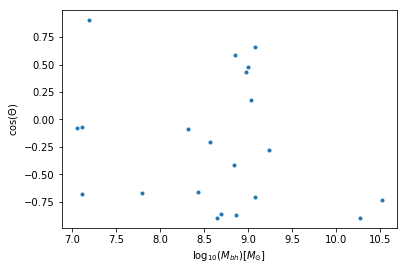

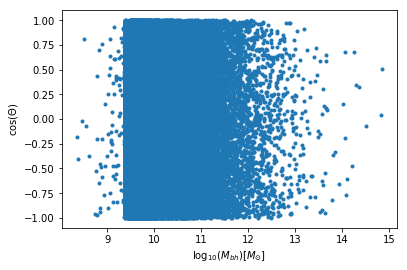

In [40]:
plt.figure()
plt.plot(np.log10(Mass_bh),cos_theta_bh,'.')
plt.xlabel('$\log_{10}(M_{bh})[M_{\odot}]$')
plt.ylabel('$\cos( \Theta ) $')
plt.savefig('Alinacion_Enviroment_bh.png')

plt.figure()
plt.plot(np.log10(Mass_halo),cos_theta_halo,'.')
plt.xlabel('$\log_{10}(M_{bh})[M_{\odot}]$')
plt.ylabel('$\cos( \Theta ) $')
plt.savefig('Alinacion_Enviroment_halo.png')